# pvops Functionality Tutorial



In [2]:
import text_class_example

import sys
sys.path.append('..')
from pvops.text import utils

#import text2series_class_example  ; uncomment when completed
import pandas as pd
import matplotlib.pyplot as plt

## Problem statements:

### 1. Text Preprocessing
Process the documents into concise, machine learning-ready documents. Additionally, extract dates from the text.

### 2. Text Classification
The written tickets are used to make an inference on the specified event descriptor.


## Text processing 

### Import text data

In [3]:
folder = 'example_data//'
filename = 'example_ML_ticket_data.csv'
df = pd.read_csv(folder+filename)
df.head(n=3)

,Date_EventStart,Date_EventEnd,Asset,CompletionDesc,Cause,ImpactLevel,randid
0,8/16/2018 9:00,8/22/2018 17:00,Combiner,cb 1.18 was found to have contactor issue woul...,0000 - Unknown.,Underperformance,38
1,9/17/2018 18:25,9/18/2018 9:50,Pad,self resolved. techdispatched: no,004 - Under voltage.,Underperformance,46
2,8/26/2019 9:00,11/5/2019 17:00,Facility,"all module rows washed, waiting for final repo...",0000 - Unknown,Underperformance,62


### Establish settings

Specify column names which will be used in this pipeline.

In [4]:
DATA_COLUMN = "CompletionDesc"   # Contains document
LABEL_COLUMN = "Asset"           # Establish event descriptor which will be inferenced by classifiers
DATE_COLUMN = 'Date_EventStart'  # Date of ticket (start date, end date; any reflective date will do), used in date extracting pipeline to replace information not specified in ticket

### Step 0: If needed, map raw labels to a cleaner set of labels

This step is 

In [5]:
asset_remap_filename = 'remappings_asset.csv'
REMAPPING_COL_FROM = 'in'
REMAPPING_COL_TO = 'out_'
remapping_df = pd.read_csv(folder+asset_remap_filename)

In [6]:
remapping_col_dict = {
    'attribute_col': LABEL_COLUMN,
    'remapping_col_from': REMAPPING_COL_FROM,
    'remapping_col_to': REMAPPING_COL_TO
}

df_remapped_assets = utils.remap_attributes(df, remapping_df, remapping_col_dict)

df = df_remapped_assets

Original attribute distribution:
Facility                  37
Inverter                  34
Tracker                    8
Combiner                   7
Substation                 3
Met station                2
Pad                        1
Meter                      1
Transformer                1
Energy Storage/Battery     1
Summary                    1
Module                     1
Ground-Mount PV System     1
Pyranometer                1
String                     1
Name: Asset, dtype: int64
Final attribute distribution:
facility        37
inverter        34
tracker          8
combiner         7
substation       3
met station      3
other            2
module           2
energy meter     2
transformer      2
Name: Asset, dtype: int64


In [7]:
df[LABEL_COLUMN].value_counts()

facility        37
inverter        34
tracker          8
combiner         7
substation       3
met station      3
other            2
module           2
energy meter     2
transformer      2
Name: Asset, dtype: int64

### Step 1: Establish example instance and render preliminary information about the tickets

In [7]:
# Establish the class object (found in text_class_example.py)
print(df[LABEL_COLUMN].value_counts())

e = text_class_example.Example(df, LABEL_COLUMN)
e.summarize_text_data(DATA_COLUMN)

facility          37
inverter          34
tracker            8
combiner           7
met station        3
substation         3
module             2
energy meter       1
energy storage     1
transformer        1
Name: Asset, dtype: int64
DETAILS
  100 samples
  0 invalid documents
  33.52 words per sample on average
  Number of unique words 1213
  3352.00 total words


### Visualize timeseries of ticket publications

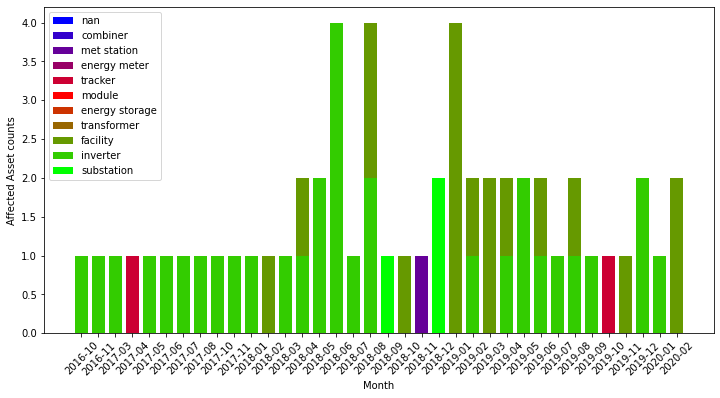

In [8]:
fig = e.visualize_attribute_timeseries(DATE_COLUMN)
plt.show()

### Functionality 1.1: Extract dates

In [9]:
# Extract date from ticket, if any. This framework is not 100% correct.
dates_df = e.extract_dates(DATA_COLUMN, DATE_COLUMN, SAVE_DATE_COLUMN='ExtractedDates')
dates_df

,CompletionDesc,ExtractedDates
0,cb 1.18 was found to have contactor issue woul...,[]
1,self resolved. techdispatched: no,[]
2,"all module rows washed, waiting for final repo...",[2019-09-01 09:00:00]
3,14 nov: we were alerted that e-c3-1 had faulte...,"[2017-11-14 07:46:00, 2017-03-01 07:46:00]"
4,assessed condition filters all inverters. litt...,[]
...,...,...
95,cleared cleared alert however psi is -3 invert...,[2016-11-03 09:28:00]
96,c4 closed remotely. techdispatched: no,[]
97,pure power fixed damaged source circuits did f...,"[2019-04-16 09:00:00, 2019-03-16 15:15:00]"
98,checked network connection to rm-1 didn't see ...,[]


### Functionality 1.2: Preprocess data for the Machine Learning classification

In [10]:
preprocessed_df = e.prep_data_for_ML(DATA_COLUMN, DATE_COLUMN)
preprocessed_df

,CompletionDesc,CleanDesc
0,utility replaced fuse. techdispatched: no,utility replaced fuse techdispatched
1,site is communicating. techdispatched: no,site communicating techdispatched
2,. techdispatched: no,techdispatched
3,all quarterly tasks have been completed. no is...,quarterly tasks completed issues discovered in...
4,"either reboot datalogger worked, issue resolve...",either reboot datalogger worked issue resolved...
...,...,...
89,"2/21/2018, f. verified that cb 3.a5 has been r...",verified cb restored visited site parallel wor...
90,inverter 11 was showing fault 6422 via scada. ...,inverter showing fault via scada inverter stil...
91,utility re-energized site,utility energized site
92,7/21/19 w/o 0287481 w-b10-1 upon arriving foun...,w w b upon arriving found inverter fault mode ...


### Results of text processing

In [11]:
print("Pre-text processing")
e.summarize_text_data(DATA_COLUMN)

print("\nPost-text processing")
e.summarize_text_data('CleanDesc')

Pre-text processing
DETAILS
  94 samples
  0 invalid documents
  35.10 words per sample on average
  Number of unique words 1197
  3299.00 total words

Post-text processing
DETAILS
  94 samples
  0 invalid documents
  21.61 words per sample on average
  Number of unique words 714
  2031.00 total words


### Visualizing entropy of clustering technique pre- and post- processing

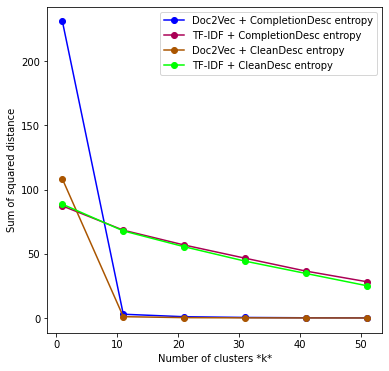

In [12]:
fig = e.visualize_cluster_entropy([DATA_COLUMN, 'CleanDesc'])
plt.show()

### Functionality 1.3: Frequency plot

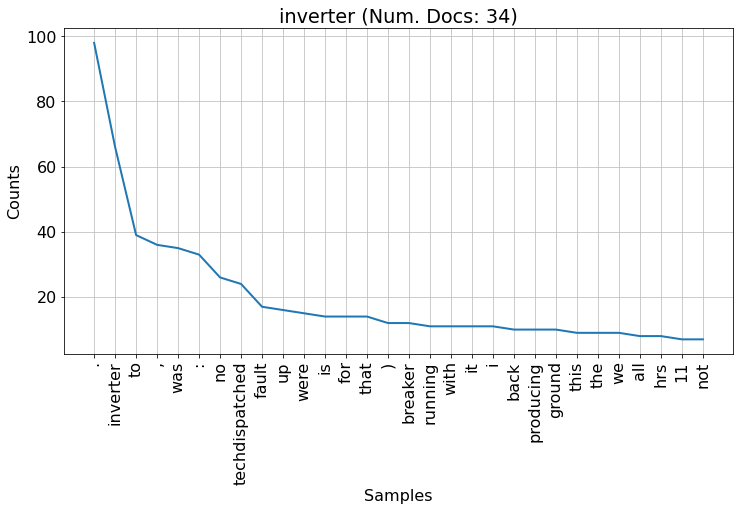

In [13]:
# Frequency plot on unprocessed data
fig = e.visualize_freqPlot(LBL_CAT='inverter', DATA_COLUMN=DATA_COLUMN)
plt.show()

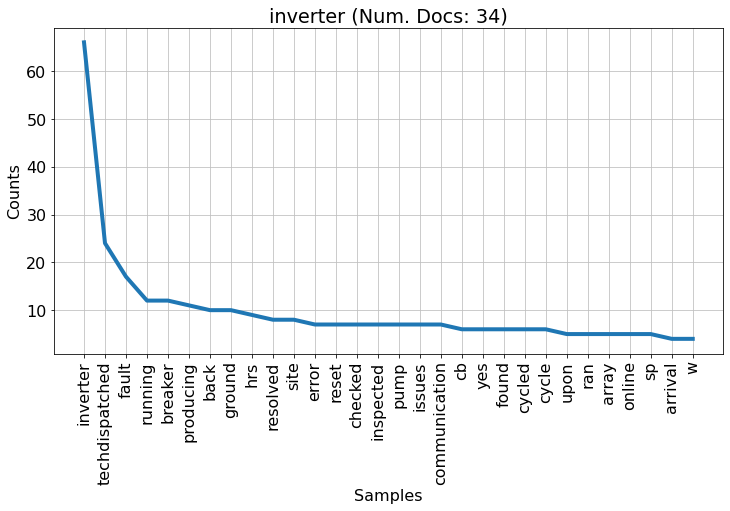

In [14]:
# Frequency plot on processed data
fig = e.visualize_freqPlot(LBL_CAT='inverter',
                            # Optional, kwargs into nltk's FreqDist
                            graph_aargs = {
                                'linewidth':4
                            }
                        )
plt.show()

### Hint: Use the below code to visualize frequency plots for all assets
    
    set_labels = list(set(e.df[e.LABEL_COLUMN].tolist()))
    for lbl in set_labels:
        fig = e.visualize_freqPlot(LBL_CAT=lbl)
        plt.show()

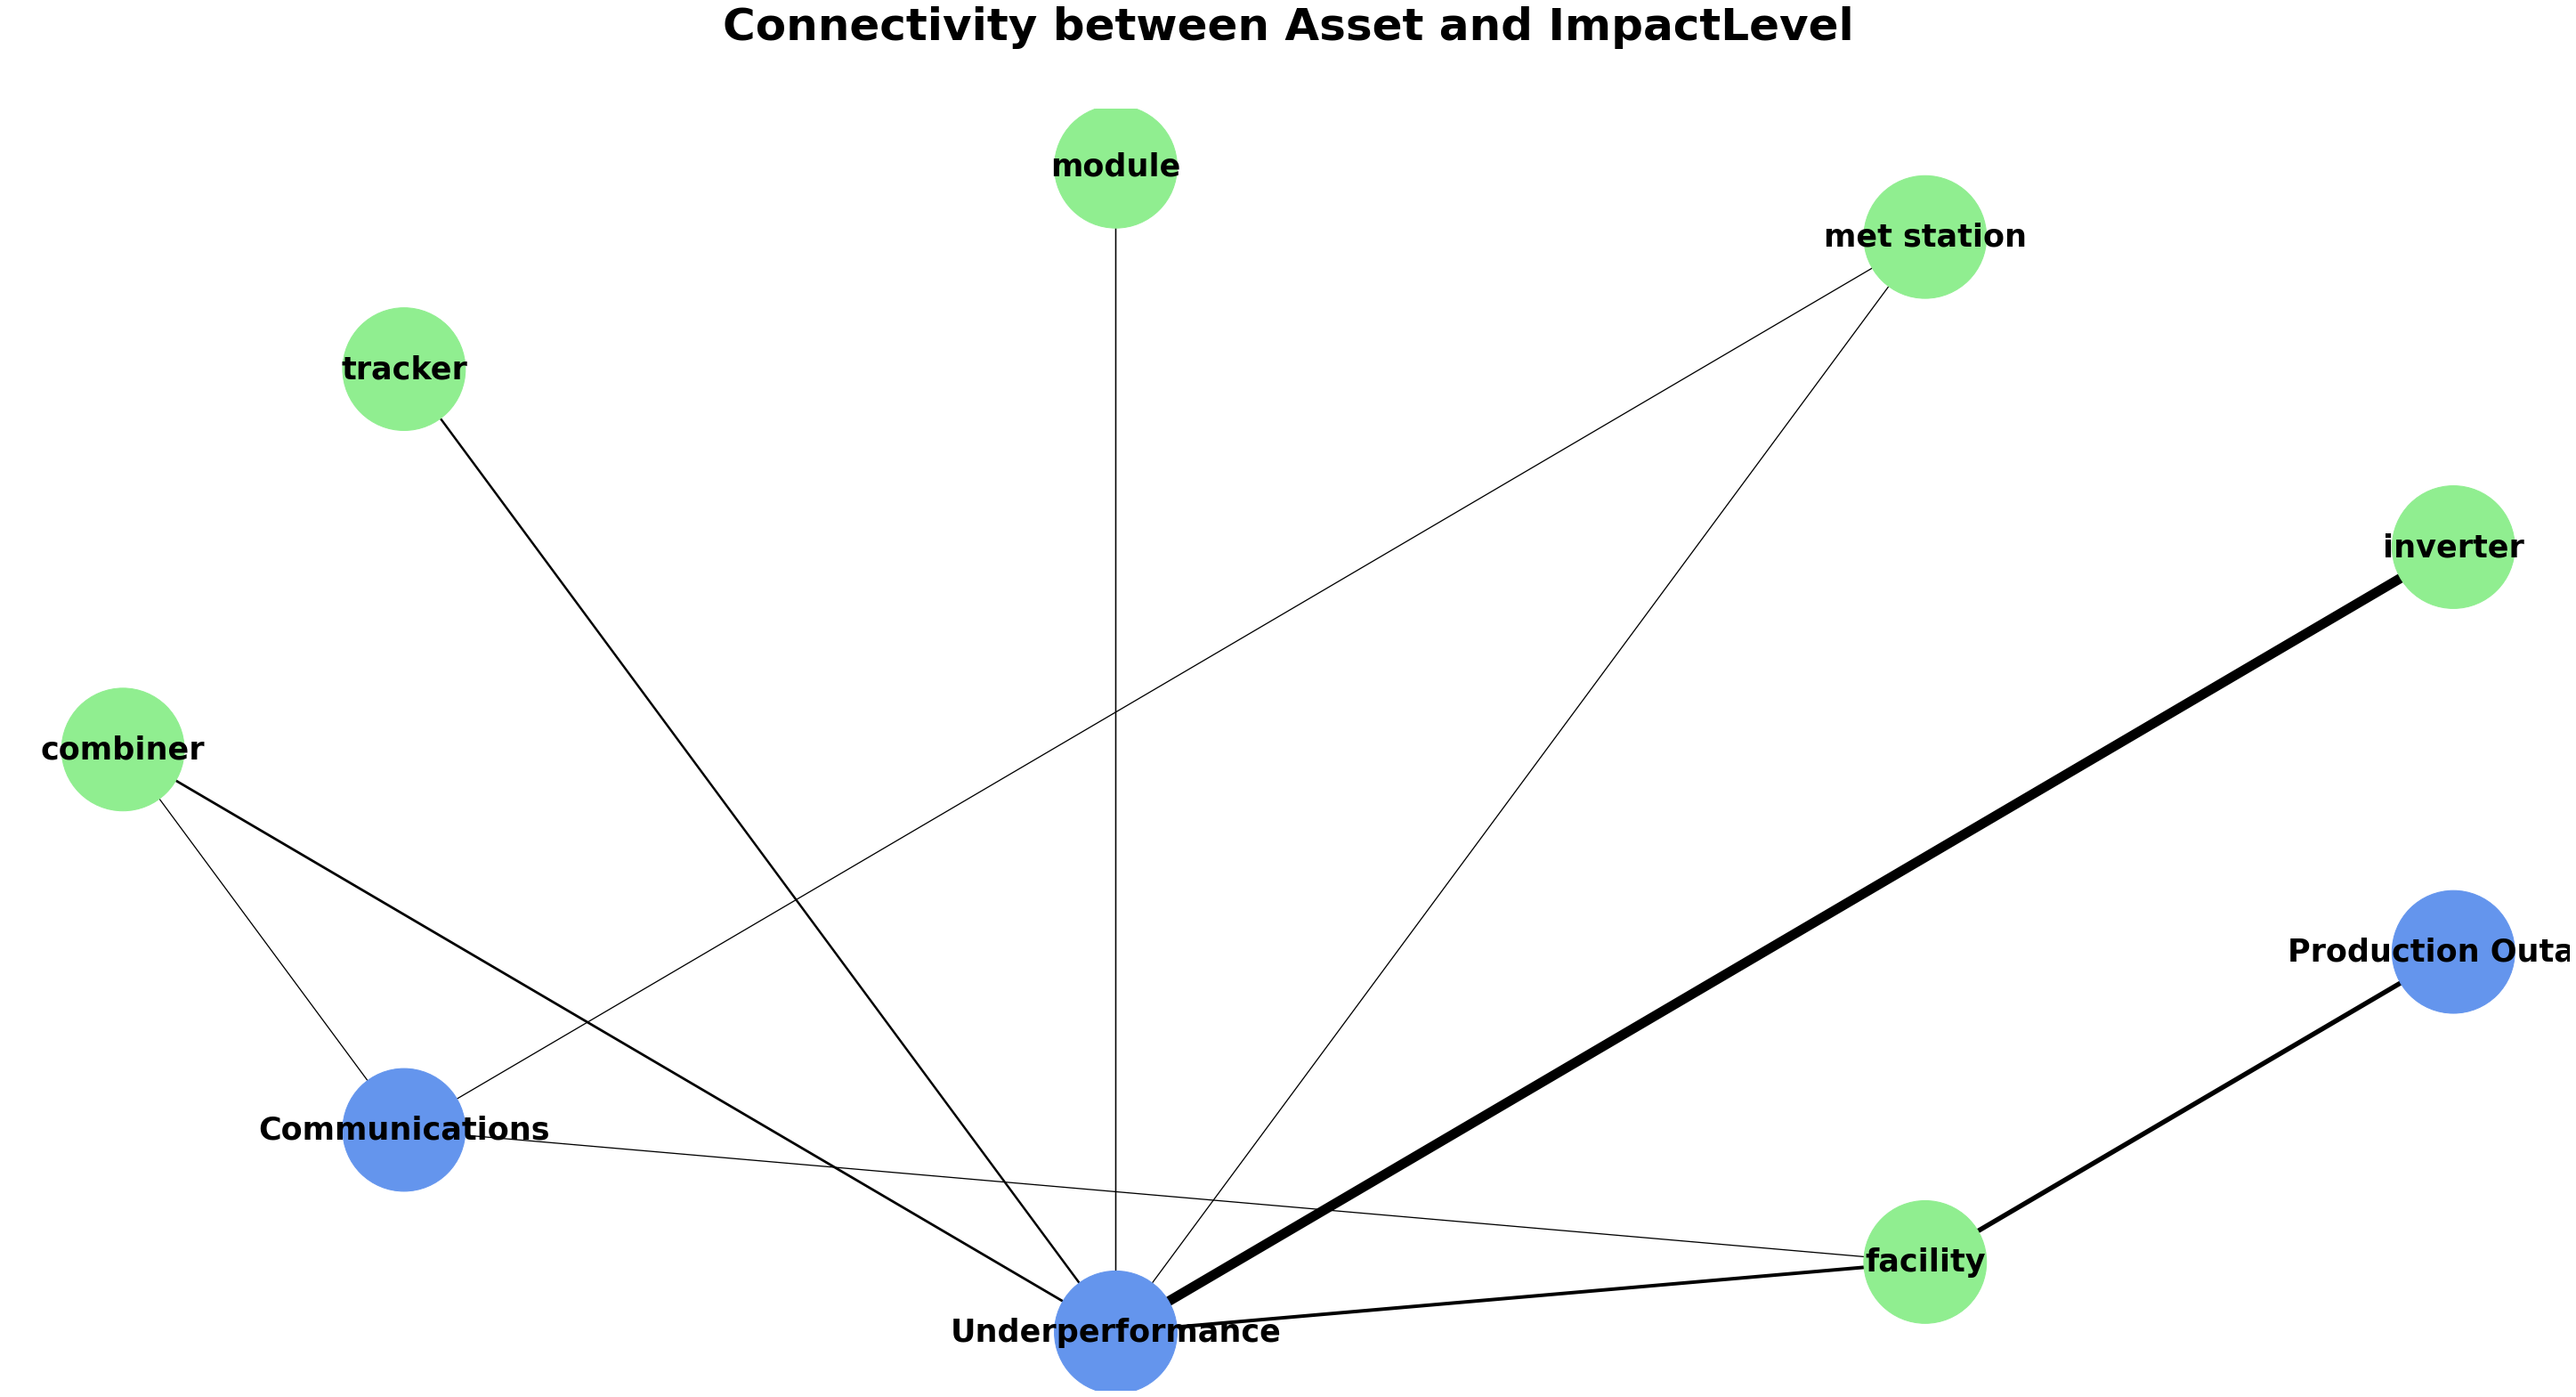

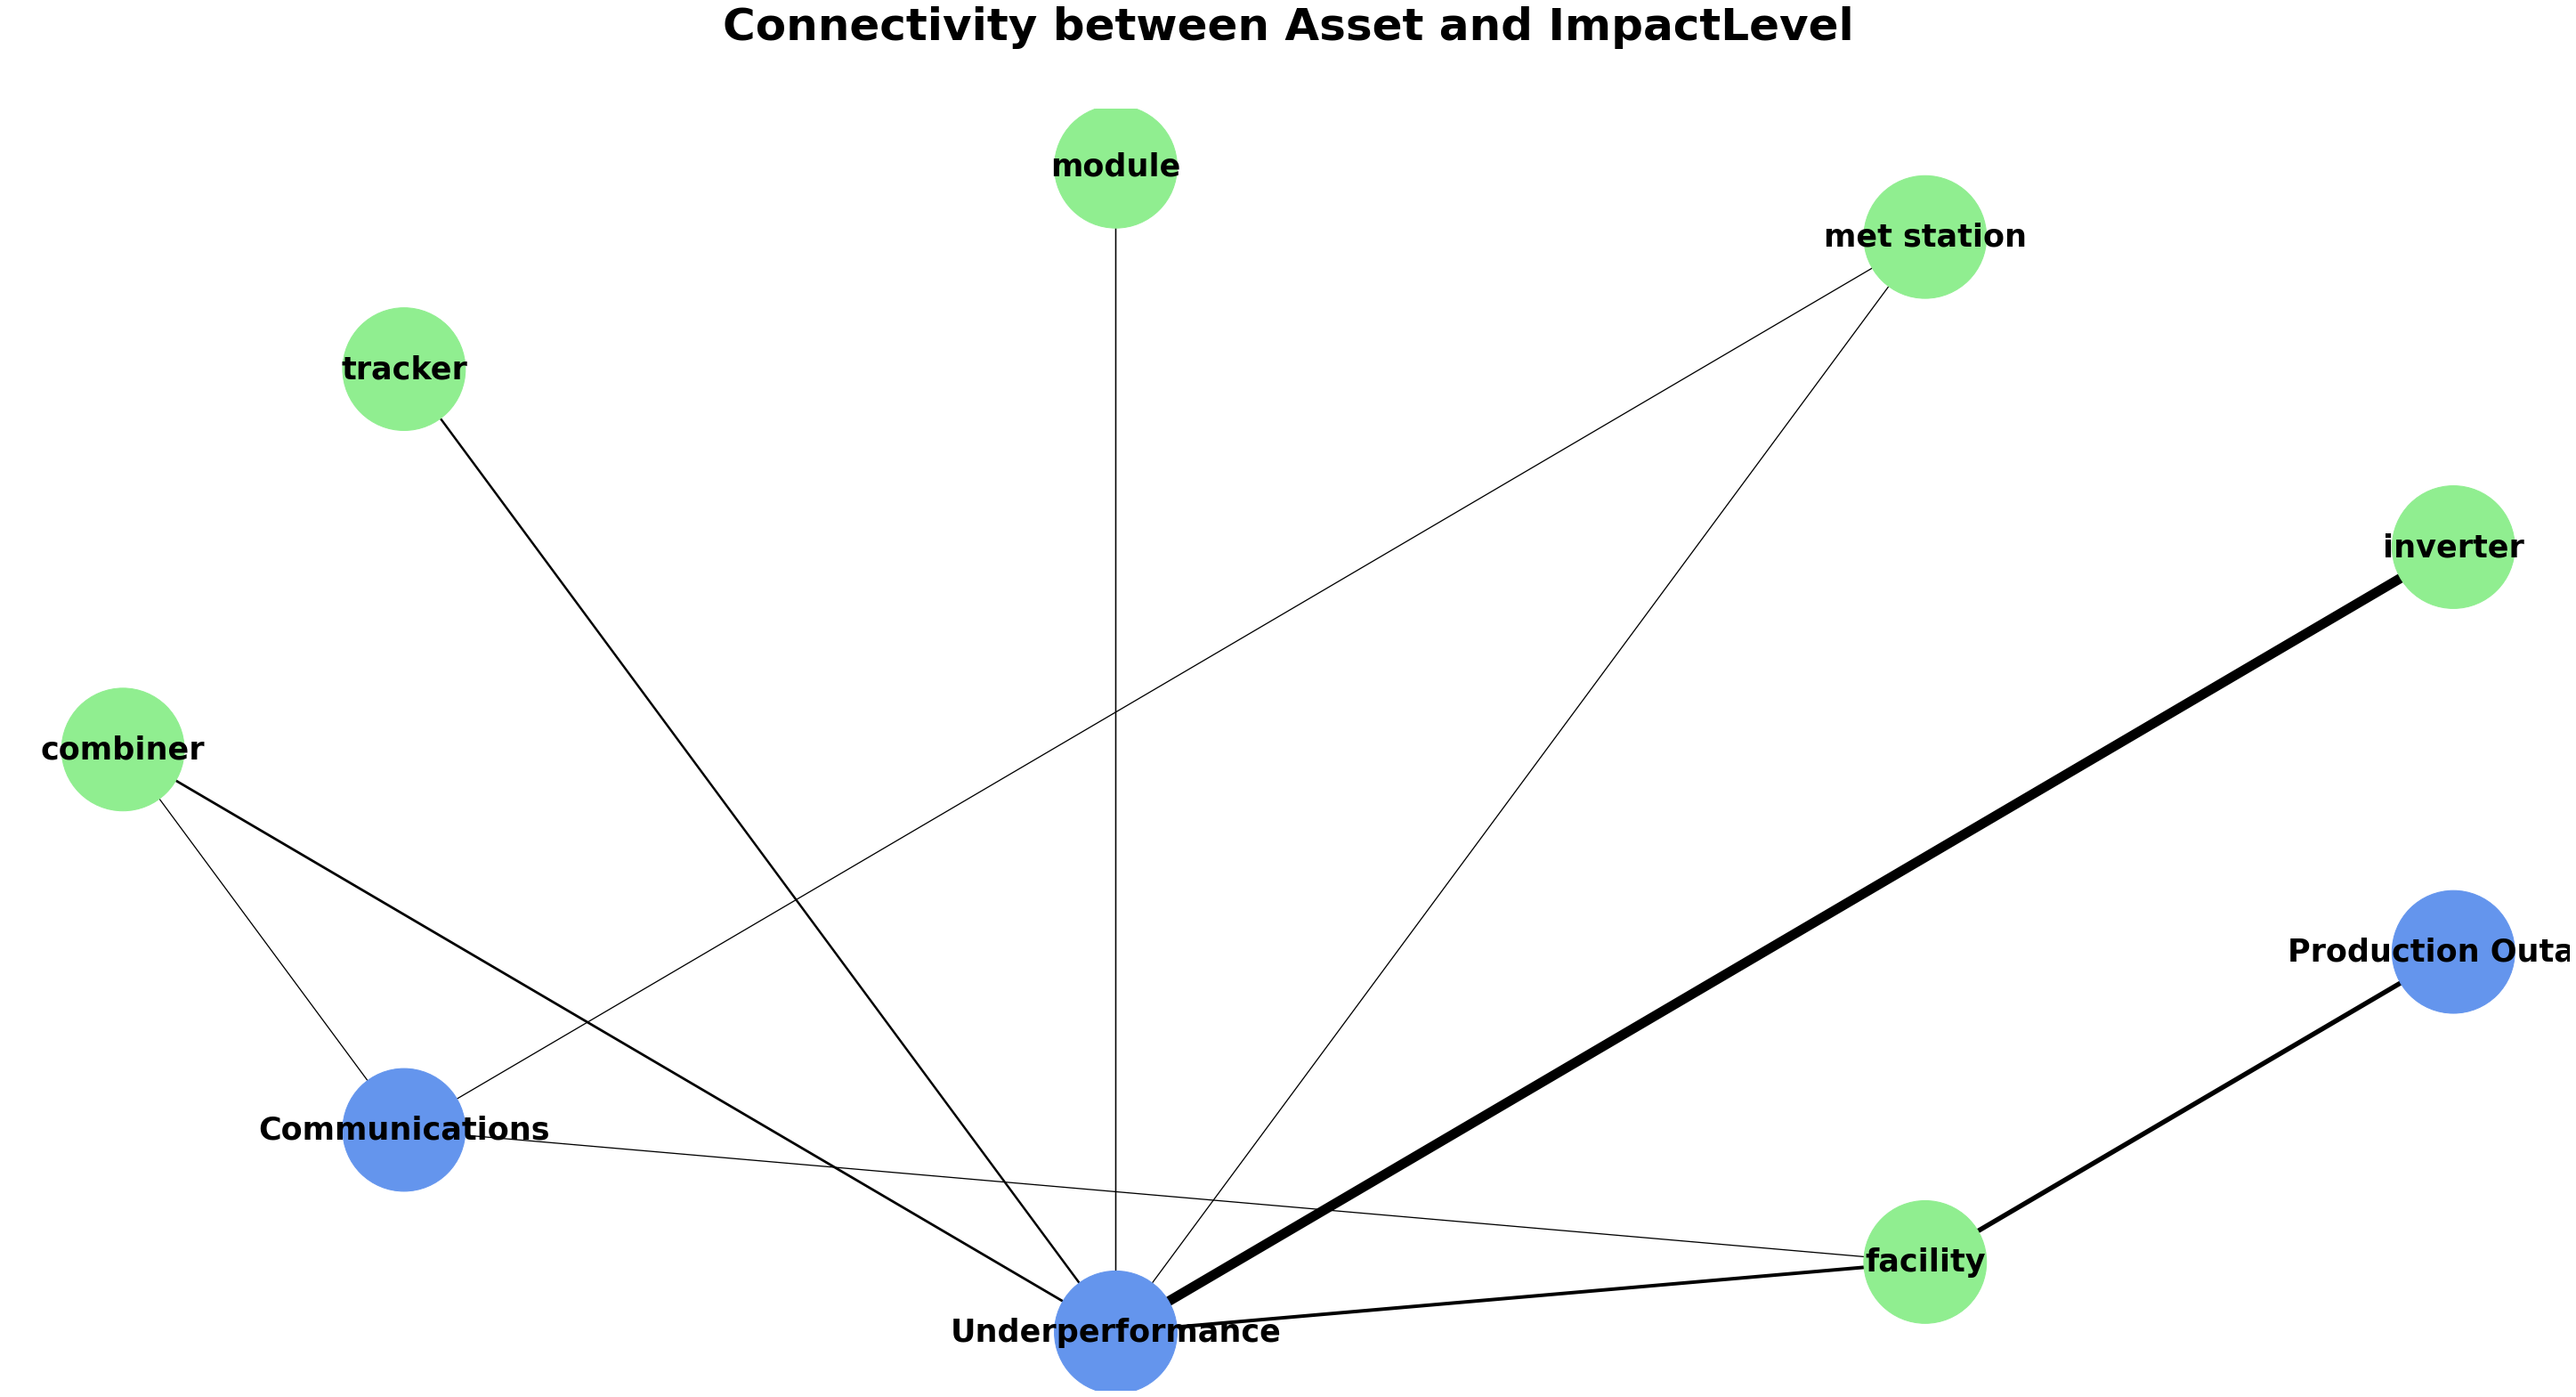

In [15]:
# Only supports two attributes
om_col_dict = {
    'attribute1_col': 'Asset',
    'attribute2_col': 'ImpactLevel'
}

fig,edges = e.visualize_attribute_connectivity(om_col_dict,
            # Optional
            graph_aargs = {'with_labels':True,
                            'font_weight':'bold',
                            'node_size':19000,
                            'font_size':35}
)
plt.show()

fig,edges = e.visualize_attribute_connectivity(om_col_dict,
            # Optional
            graph_aargs = {'with_labels':True,
                            'font_weight':'bold',
                            'node_size':19000,
                            'font_size':35}
    )
plt.show()

### Functionality 2.1: Conduct supervised classification on tickets using a cross-validated grid search

In [16]:
# Setting few cross validation splits because of few example data
results, best_model = e.classify_supervised(n_cv_splits=2, embedding='doc2vec')
print('best_model', best_model)
results

Starting ML analysis with Doc2Vec embeddings
C:\Users\Michael Hopwood\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\Michael Hopwood\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\Michael Hopwood\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\Michael Hopwood\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\b

,estimator,min_score,mean_score,max_score,std_score,mean_fit_time,clf__C,clf__max_iter,doc2vec__epochs,doc2vec__vector_size,...,clf__alpha,clf__batch_size,clf__hidden_layer_sizes,clf__learning_rate,clf__solver,clf__loss,clf__normalize,clf__n_estimators,clf__max_samples,clf__algorithm
230,RandomForestClassifier,0.426522,0.434545,0.442568,0.00802327,0.7425,NaN,NaN,30,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200,NaN,NaN
280,AdaBoostClassifier,0.362186,0.433891,0.505597,0.0717057,0.5425,NaN,NaN,30,40,...,NaN,NaN,NaN,0.8,NaN,NaN,NaN,100,NaN,SAMME.R
223,ExtraTreesClassifier,0.3988,0.415969,0.433138,0.0171693,0.8085,NaN,NaN,30,100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200,NaN,NaN
124,LogisticRegression,0.381456,0.413854,0.446251,0.0323975,0.4705,1291.55,NaN,30,40,...,NaN,NaN,NaN,NaN,lbfgs,NaN,NaN,NaN,NaN,NaN
245,BaggingClassifier,0.372567,0.412018,0.451469,0.0394512,0.528498,NaN,NaN,30,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,PassiveAggressiveClassifier,0.00765957,0.0105048,0.01335,0.00284522,0.3375,0,NaN,30,40,...,NaN,NaN,NaN,NaN,NaN,hinge,NaN,NaN,NaN,NaN
158,PassiveAggressiveClassifier,0.00765957,0.0105048,0.01335,0.00284522,0.355499,0,NaN,30,100,...,NaN,NaN,NaN,NaN,NaN,hinge,NaN,NaN,NaN,NaN
162,PassiveAggressiveClassifier,0.00765957,0.0105048,0.01335,0.00284522,0.367502,0,NaN,30,100,...,NaN,NaN,NaN,NaN,NaN,squared_hinge,NaN,NaN,NaN,NaN
161,PassiveAggressiveClassifier,0.00765957,0.0105048,0.01335,0.00284522,0.499501,0,NaN,30,40,...,NaN,NaN,NaN,NaN,NaN,squared_hinge,NaN,NaN,NaN,NaN


### Functionality 1.4: Conduct unsupervised clustering  on tickets using a cross-validated grid search

In [17]:
# Setting few cross validation splits because of few example data
results, best_model = e.classify_unsupervised(n_cv_splits=2, embedding='doc2vec')
print('best_model', best_model)
results

Starting ML analysis with Doc2Vec embeddings
C:\Users\Michael Hopwood\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\Michael Hopwood\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\Michael Hopwood\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\cluster\_birch.py:638: ConvergenceWarning: Number of subclusters found (3) by Birch is less than (7). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
C:\Users\Michael Hopwood\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\base.py:197: F

,estimator,min_score,mean_score,max_score,std_score,mean_fit_time,clf__damping,clf__max_iter,doc2vec__epochs,doc2vec__vector_size,doc2vec__window,clf__branching_factor,clf__n_clusters,clf__threshold,clf__init,clf__n_init,clf__bandwidth,clf__bin_seeding
6,AffinityPropagation,0.197163,0.244455,0.291748,0.0472929,0.371502,0.5,600,30,100,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AffinityPropagation,0.181901,0.241536,0.301172,0.0596355,0.599999,0.5,600,30,40,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,KMeans,0.197303,0.236902,0.276501,0.0395991,0.3925,NaN,NaN,30,40,10,NaN,7,NaN,random,10,NaN,NaN
1,AffinityPropagation,0.160689,0.2312,0.301711,0.0705111,0.409999,0.5,200,30,40,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,KMeans,0.180036,0.228644,0.277252,0.0486082,0.574,NaN,NaN,30,100,10,NaN,7,NaN,k-means++,50,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,Birch,-3.88906e-17,-1.94453e-17,0,1.94453e-17,0.267498,NaN,NaN,30,100,10,100,7,1,NaN,NaN,NaN,NaN
22,Birch,-3.88906e-17,-1.94453e-17,0,1.94453e-17,0.357501,NaN,NaN,30,100,5,50,7,0.75,NaN,NaN,NaN,NaN
21,Birch,-3.88906e-17,-1.94453e-17,0,1.94453e-17,0.414,NaN,NaN,30,40,10,50,7,0.75,NaN,NaN,NaN,NaN
20,Birch,-3.88906e-17,-1.94453e-17,0,1.94453e-17,0.3215,NaN,NaN,30,40,5,50,7,0.75,NaN,NaN,NaN,NaN


In [18]:
e.predict_best_model(ml_type = 'supervised')

Best algorithm found:
 Pipeline(memory=None,
         steps=[('doc2vec',
                 Doc2VecModel(callbacks=None, comment=None, dbow_words=0, dm=1,
                              dm_concat=0, dm_mean=None, dm_tag_count=1,
                              dv=None, dv_mapfile=None, epochs=30,
                              trim_rule=None, vector_size=100, window=5)),
                ('clf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                     

In [19]:
e.predict_best_model(ml_type = 'unsupervised')

C:\Users\Michael Hopwood\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
Best algorithm found:
 Pipeline(memory=None,
         steps=[('doc2vec',
                 Doc2VecModel(callbacks=None, comment=None, dbow_words=0, dm=1,
                              dm_concat=0, dm_mean=None, dm_tag_count=1,
                              dv=None, dv_mapfile=None, epochs=30,
                              trim_rule=None, vector_size=100, window=5)),
                ('to_dense', DataDensifier()),
                ('clf',
                 AffinityPropagation(affinity='euclidean', convergence_iter=15,
                                     copy=True, damping=0.5, max_iter=600,
                                     preference=None, verbose=False))],
         verbose=False)
Predictions stored to 

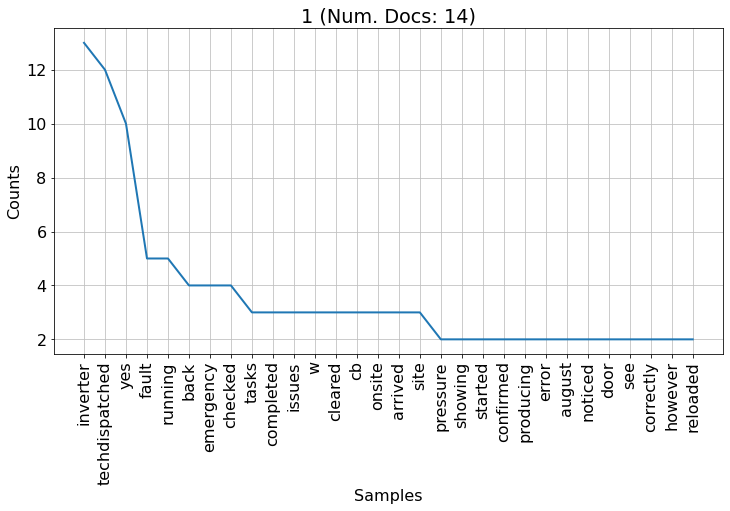

FreqDist({'inverter': 13, 'techdispatched': 12, 'yes': 10, 'fault': 5, 'running': 5, 'back': 4, 'emergency': 4, 'checked': 4, 'tasks': 3, 'completed': 3, ...})

In [20]:
e.LABEL_COLUMN = 'Unsupervised_Pred_Asset'
e.visualize_freqPlot(LBL_CAT = 1)

## Visualize Word Clusters

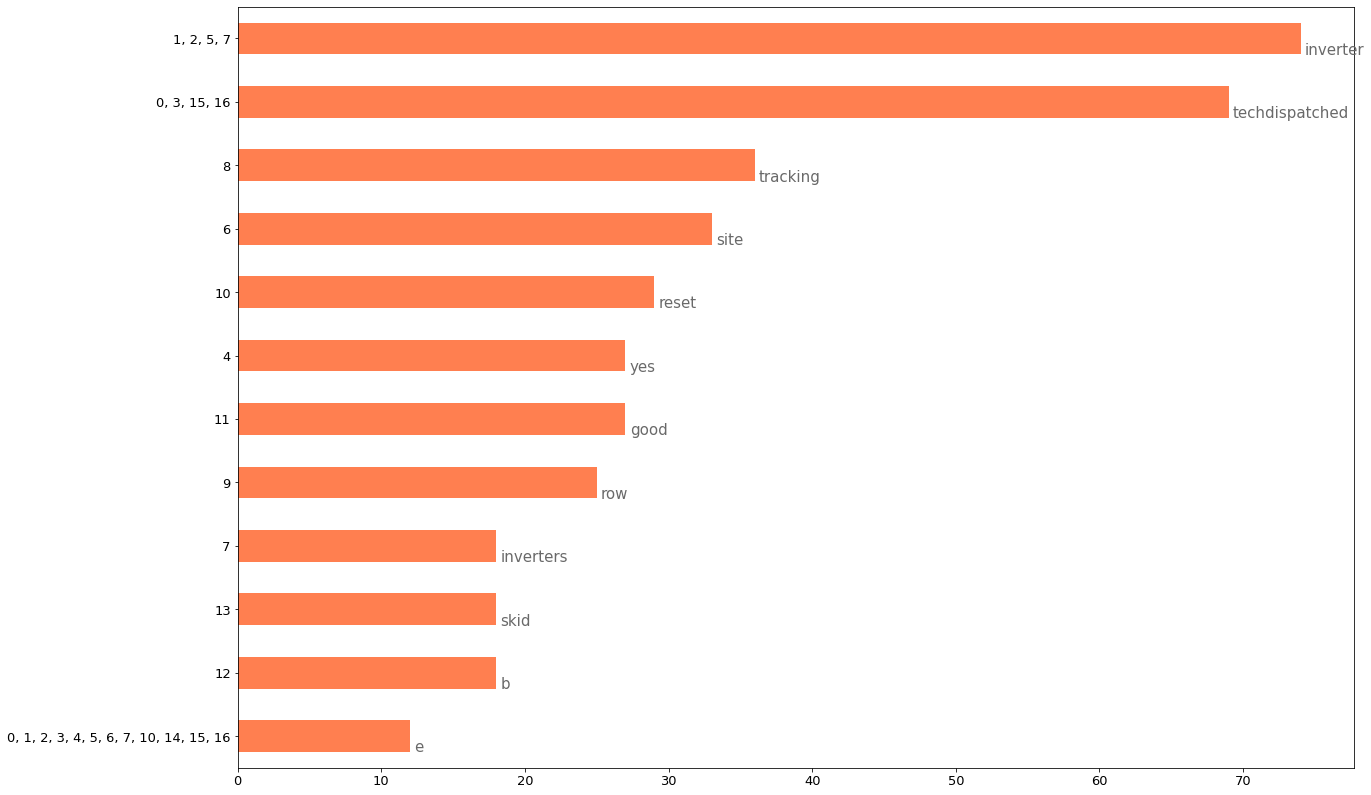

In [21]:
fig = e.visualize_document_clusters(min_frequency=10, DATA_COLUMN='CleanDesc')
plt.show()

### Seeing the popularity of `techdispatched`, one might consider adding `techdispatched` to the stopwords list